In [1]:
# Maddie Schwarz
# Notebook for Calculating Surface Roughness metrics used in Quals Report
import sys
import os
sys.path.append('Modules/demCreationComponents/')
sys.path.append('Modules/demAnalysisComponents/')
import baseGrid as bg
import dem as dpy
from matplotlib import pyplot as plt
import numpy as np
from importlib import reload

#%matplotlib notebook
%matplotlib inline
%matplotlib widget
## include 'notebook' when using traditional jupyter notebook interface
## include 'widget' when using VSCODE jupyter notebooks for interactive plots
## include inline for viewing figs in VSCODE

print(os.getcwd())
print("test")

/workspaces/rgr/src
test


## 1. Compute Roughness of each Study Area

In [2]:
# Define Paths to AOI DEMs
grabenPath = os.path.join('Quals_DEMs/demgraben2011.tif')
sdPath = os.path.join('Quals_DEMs/demsd2011.tif') # South of Dunes fault--- just for fault analysis, might not need roughness map
mzPath = os.path.join('Quals_DEMs/demmz2011.tif') 
zapPath = os.path.join('Quals_DEMs/demzap2011.tif')
tobPath = os.path.join('Quals_DEMs/demtob2011.tif')

#Load rasters as grids 
grabenDEM = dpy.demGrid([],rasterPath = grabenPath)
sdDEM = dpy.demGrid([],rasterPath= sdPath)
mzDEM = dpy.demGrid([],rasterPath= mzPath)
zapDEM  = dpy.demGrid([],rasterPath=zapPath)
tobDEM = dpy.demGrid([],rasterPath=tobPath)

#print min & max values of raster
def printminmax(dem):
    print(str(dem)+':')
    print('raster min: ',dem.min())
    print('raster max: ',dem.max())
    
printminmax(grabenDEM)
printminmax(sdDEM)
printminmax(mzDEM)
printminmax(zapDEM)
printminmax(tobDEM)

/opt/conda/envs/rgr/lib/python3.8/site-packages/osgeo/gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


<dem.demGrid object at 0x7feb234c9c10>:
raster min:  -9999.0
raster max:  2664.9619140625
<dem.demGrid object at 0x7febd4189d60>:
raster min:  -9999.0
raster max:  2616.242919921875
<dem.demGrid object at 0x7febd4189ca0>:
raster min:  -9999.0
raster max:  2688.47802734375
<dem.demGrid object at 0x7feb234c9f10>:
raster min:  -9999.0
raster max:  2872.5458984375
<dem.demGrid object at 0x7feb234c9dc0>:
raster min:  -9999.0
raster max:  2940.840087890625


<Axes: >

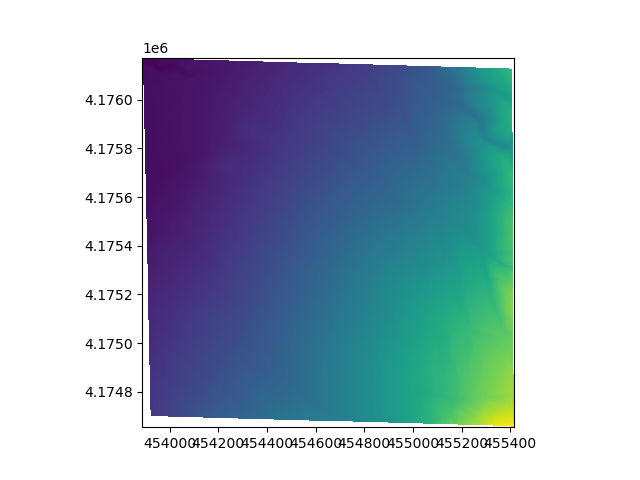

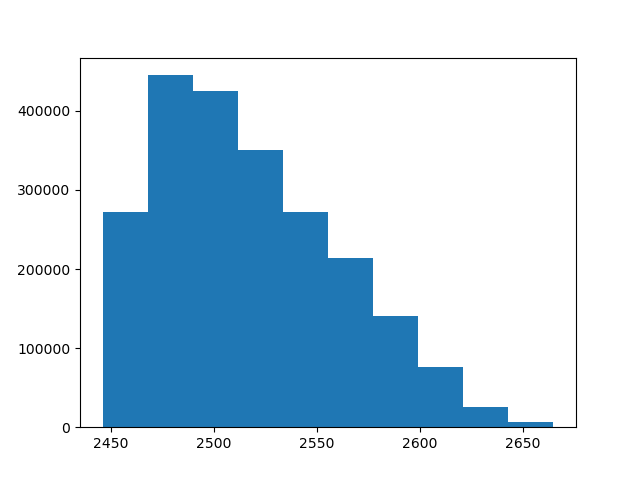

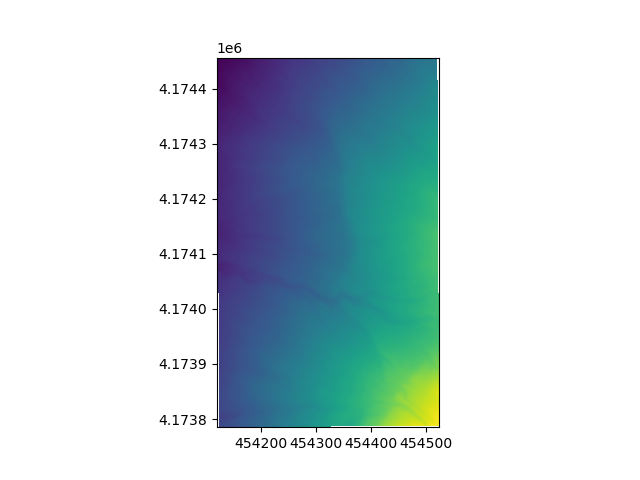

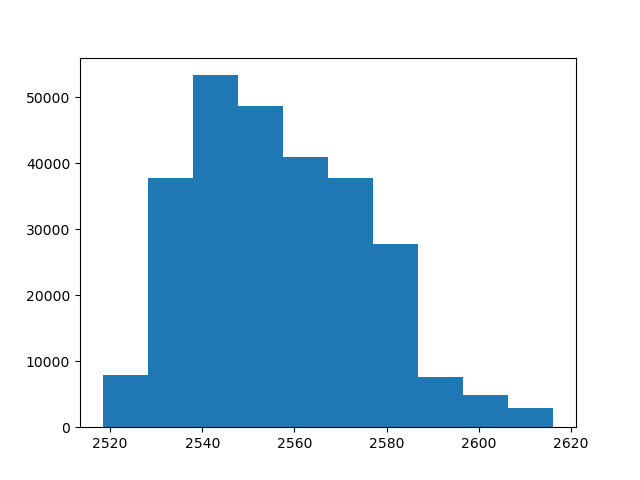

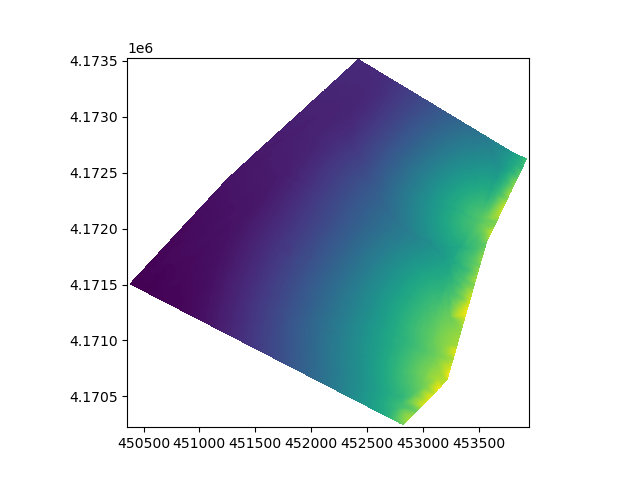

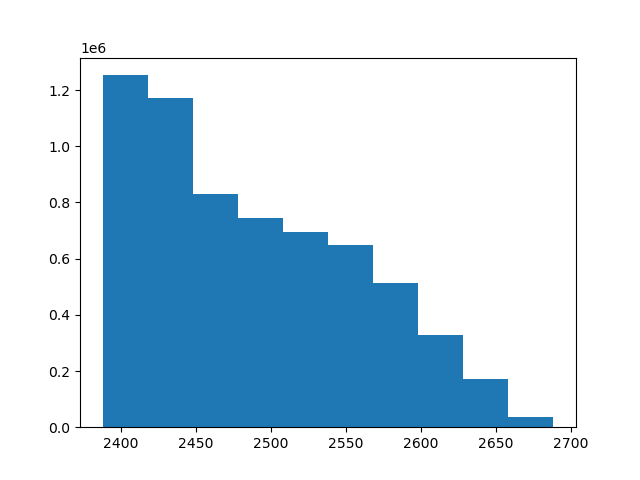

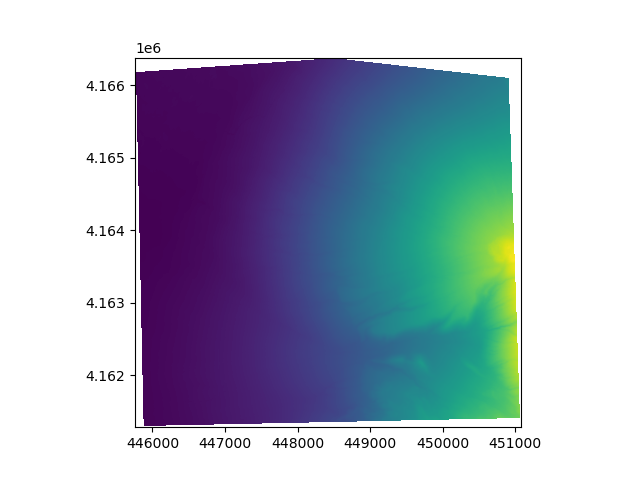

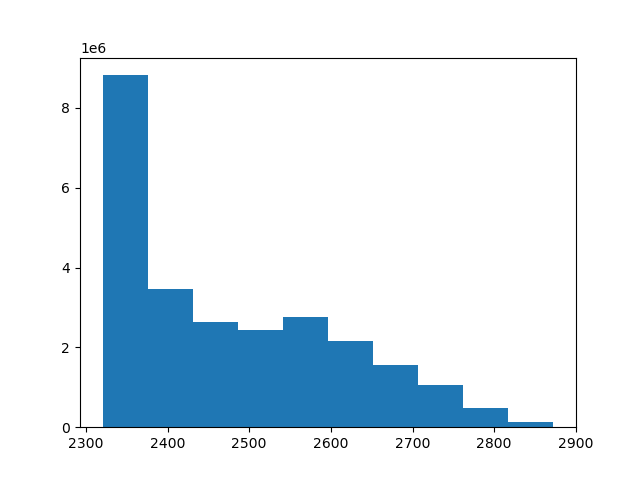

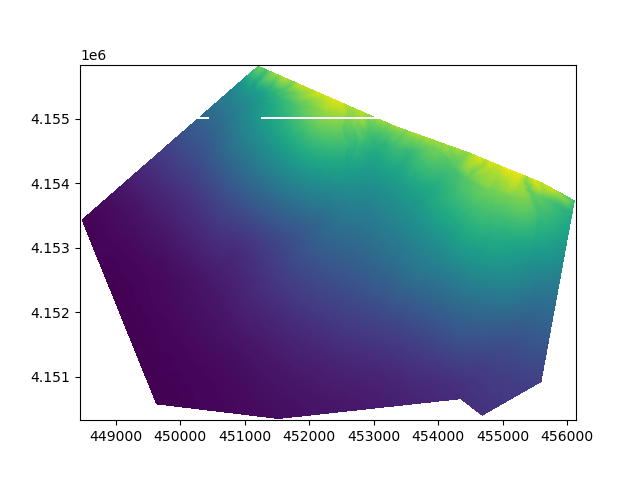

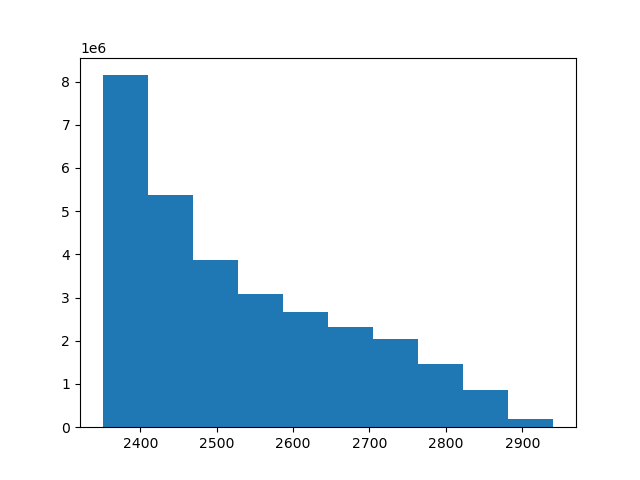

In [3]:
#Remove NoDATA Values --- from min, we see NDV is -9999; this will disrupt out plots

ndv = -9999 # for this dataset, all the DEMs have same NoDataValue
# Remobe ndv w/ Masked Grid
grabenDEM.getGridExtent()
grabenDEM = grabenDEM.returnMaskedGrid(grabenDEM!=ndv)
grabenDEM.plotGrid()
grabenDEM.plotHistogram()

sdDEM.getGridExtent()
sdDEM = sdDEM.returnMaskedGrid(sdDEM!=ndv)
sdDEM.plotGrid()
sdDEM.plotHistogram()

mzDEM.getGridExtent()
mzDEM = mzDEM.returnMaskedGrid(mzDEM!=ndv)
mzDEM.plotGrid()
mzDEM.plotHistogram()

zapDEM.getGridExtent()
zapDEM = zapDEM.returnMaskedGrid(zapDEM!=ndv)
zapDEM.plotGrid()
zapDEM.plotHistogram()

tobDEM.getGridExtent()
tobDEM = tobDEM.returnMaskedGrid(tobDEM!=ndv)
tobDEM.plotGrid()
tobDEM.plotHistogram()


In [4]:
# close pyplots
plt.close()

<Axes: >

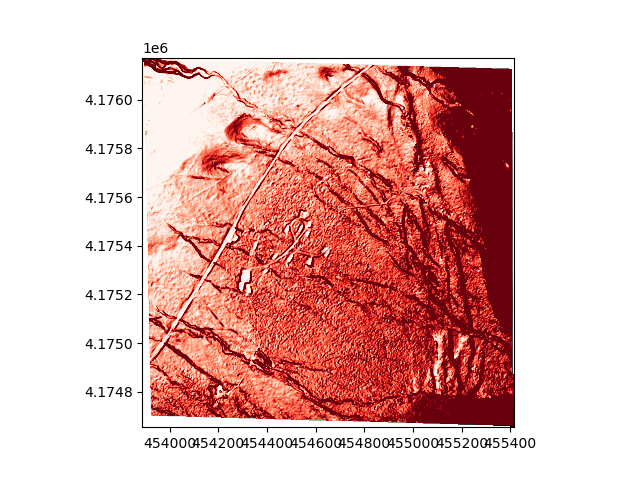

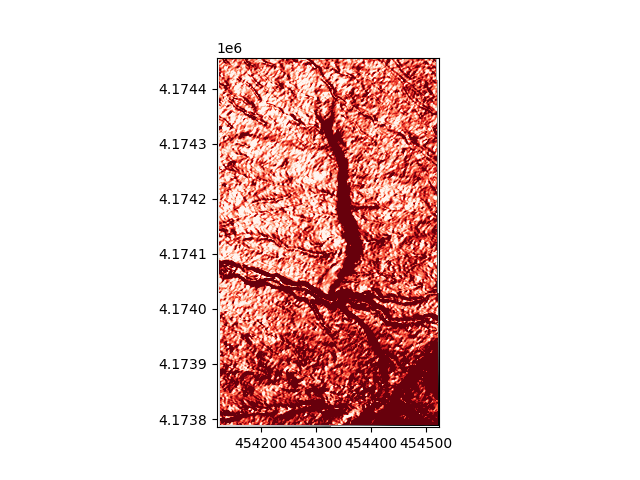

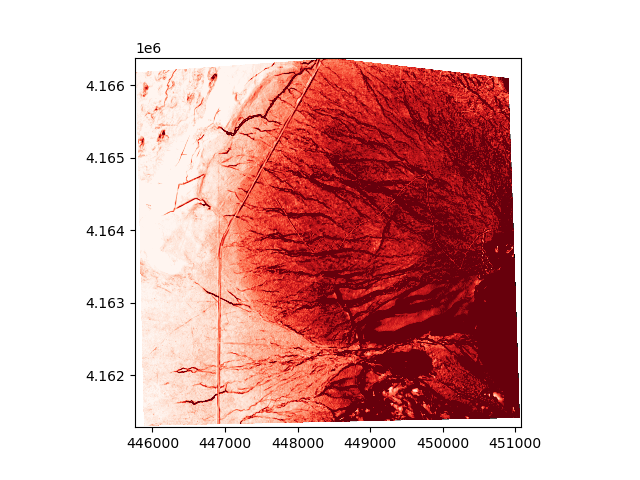

In [5]:
#Calculate Slope (i.e. the magnitude of slope)
grabenSlopeM = grabenDEM.calcFiniteSlopeMagOverWindow(N = 2) # Moving window size 2X2
sdSlopeM = sdDEM.calcFiniteSlopeMagOverWindow(N=2)
mzSlopeM = mzDEM.calcFiniteSlopeMagOverWindow(N=2)
zapSlopeM = zapDEM.calcFiniteSlopeMagOverWindow(N=2)
tobSlopeM = tobDEM.calcFiniteSlopeMagOverWindow(N=2)


ax = grabenDEM.plotGrid(cmap = 'Greys') # set ax to test dem grid
vmin,vmax = grabenSlopeM.percentile([10,75]) # modify percentile values for raster stretch
grabenSlopeM.plotGrid(axs = ax, cmap = 'Reds',vmin=vmin, vmax = vmax, alpha = 1)

ax = sdDEM.plotGrid(cmap = 'Greys')
vmin,vmax = sdSlopeM.percentile([10,75])
sdSlopeM.plotGrid(axs = ax,cmap = 'Reds',vmin=vmin, vmax = vmax, alpha = 1)

# ax = mzDEM.plotGrid(cmap = 'Greys')
# vmin,vmax = mzSlopeM.percentile([10,75])
# mzSlopeM.plotGrid(axs = ax,cmap = 'Reds',vmin=vmin, vmax = vmax, alpha = 1)

ax = zapDEM.plotGrid(cmap = 'Greys')
vmin,vmax = zapSlopeM.percentile([10,75])
zapSlopeM.plotGrid(axs = ax,cmap = 'Reds',vmin=vmin, vmax = vmax, alpha = 1)

# ax = tobDEM.plotGrid(cmap = 'Greys')
# vmin,vmax = tobSlopeM.percentile([5,80])
# tobSlopeM.plotGrid(axs = ax,cmap = 'Reds',vmin=vmin, vmax = vmax, alpha = 1)


In [6]:
#slopeMag.overwriteSaveFile()

No such comm: c959f33c496a4f5ebf069a48d805b4d9


In [7]:
# close pyplots
plt.close()

## Calculate Roughness of each Study area

#### Graben

No such comm: 057f09574df745228388cc3829994a43


<AxesSubplot: >

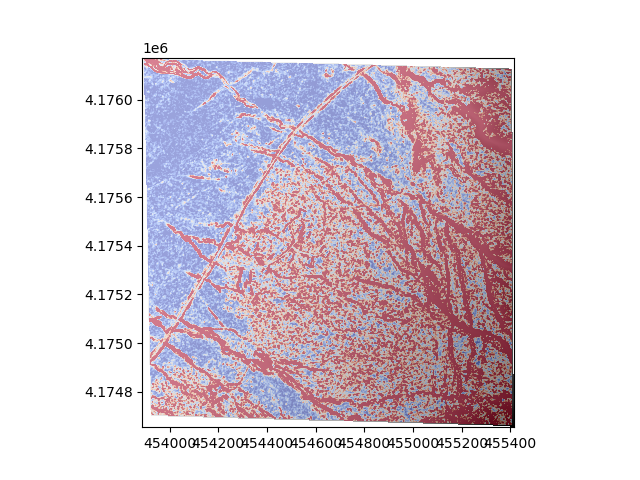

No such comm: 30faa2272d1d4a519bd17dbd52236463


<Axes: >

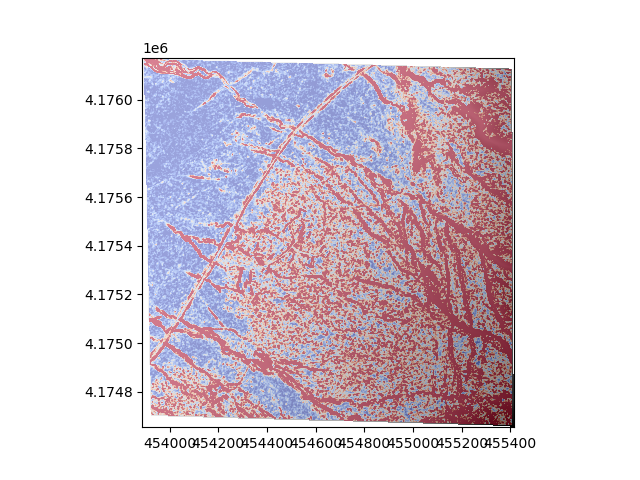

In [8]:
#Calculate Standard deviation of slope
## this calculation is more intensive, will take a bit more time
## split into multiple cells for efficiency

# define pixel width of moving window & window shape
pixel_width = 5
do_use_circular_window = True #Else, use a square kernel

grabRough5 = grabenSlopeM.calculateWindowedSTD(pixel_width,do_use_circular_window)
# Plot Roughness Maps & Histograms
vmin,vmax = grabRough5.percentile([10,75])
ax = grabenDEM.plotGrid(cmap = 'Greys')
grabRough5.plotGrid(axs = ax, cmap = 'coolwarm', alpha = 0.5, vmin = vmin, vmax = vmax)
#grabRough5.plotHistogram()


#### Pinon

<Axes: >

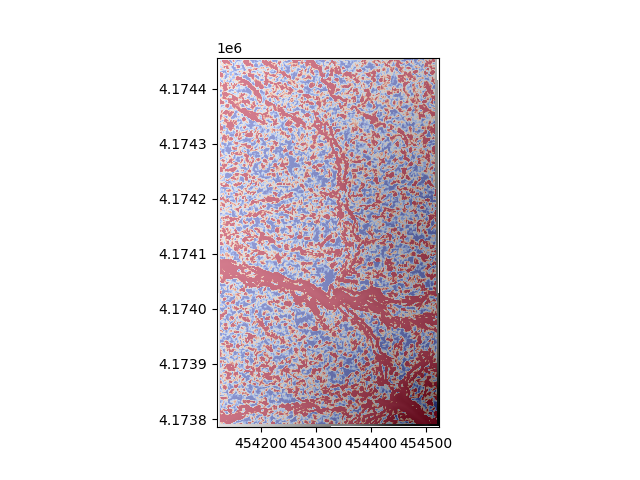

In [9]:
sdRough5 = sdSlopeM.calculateWindowedSTD(pixel_width,do_use_circular_window)
vmin,vmax = sdRough5.percentile([10,75])
ax = sdDEM.plotGrid(cmap = 'Greys')
sdRough5.plotGrid(axs = ax, cmap = 'coolwarm', alpha = 0.5, vmin = vmin, vmax = vmax)
#sdRough5.plotHistogram()

#### Mid Zapata

In [10]:
# mzRough5 = mzSlopeM.calculateWindowedSTD(pixel_width,do_use_circular_window)
# vmin,vmax = mzRough5.percentile([10,75])
# ax = mzDEM.plotGrid(cmap = 'Greys')
# mzRough5.plotGrid(axs = ax, cmap = 'coolwarm', alpha = 0.5, vmin = vmin, vmax = vmax)
# mzRough5.plotHistogram()

#### Zapata

<Axes: >

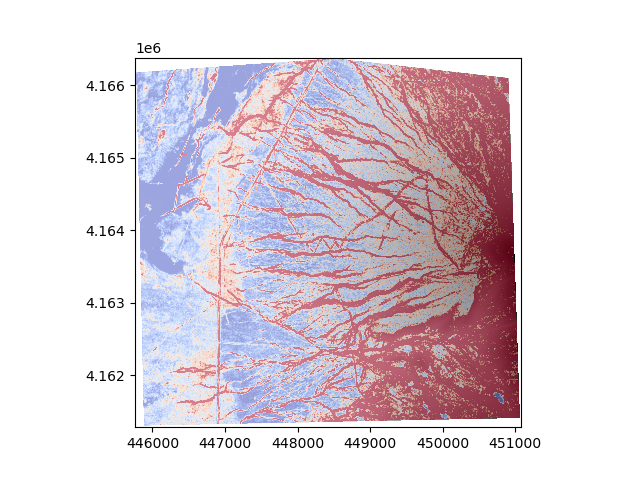

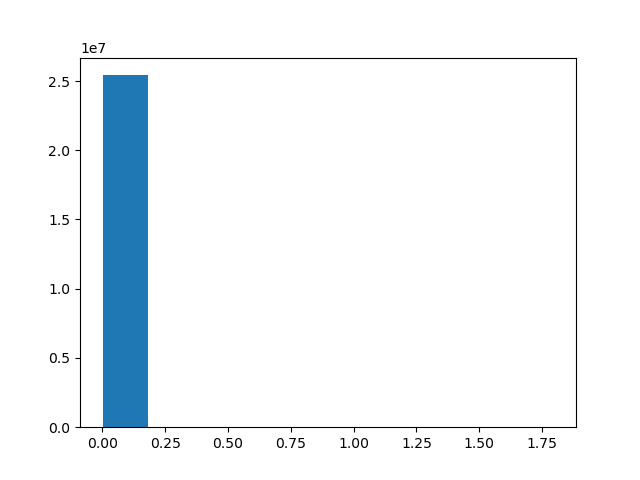

In [11]:

zapRough5 = zapSlopeM.calculateWindowedSTD(pixel_width,do_use_circular_window)
vmin,vmax = zapRough5.percentile([10,75])
ax = zapDEM.plotGrid(cmap = 'Greys')
zapRough5.plotGrid(axs = ax, cmap = 'coolwarm', alpha = 0.5, vmin = vmin, vmax = vmax)
zapRough5.plotHistogram()

#### Tobin

<Axes: >

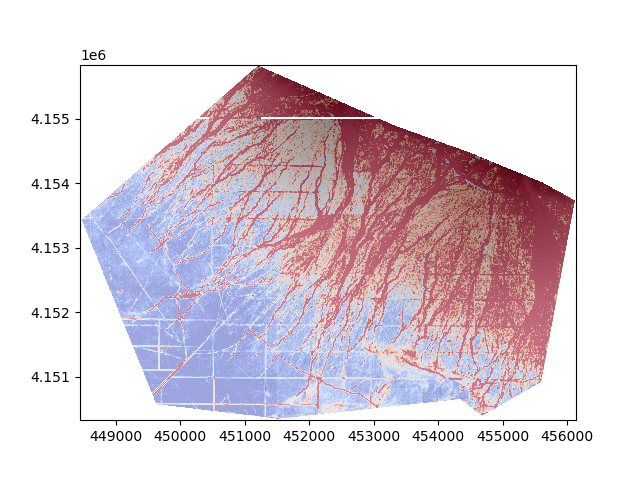

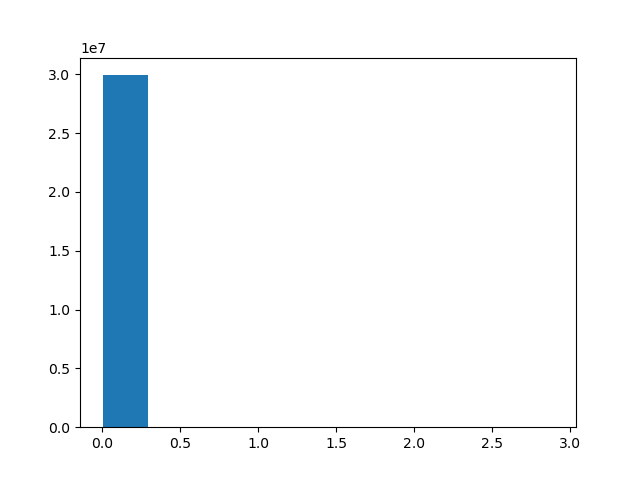

In [12]:

tobRough5 = tobSlopeM.calculateWindowedSTD(pixel_width,do_use_circular_window)
vmin,vmax = tobRough5.percentile([10,75])
ax = tobDEM.plotGrid(cmap = 'Greys')
tobRough5.plotGrid(axs = ax, cmap = 'coolwarm', alpha = 0.5, vmin = vmin, vmax = vmax)
tobRough5.plotHistogram()

#### Save Roughness Maps as TIFs

In [13]:
# Save Roughness maps as TIFs -- uncomment to save 

# grabRough5.overwriteSaveFile()
# sdRough5.overwriteSaveFile()
# mzRough5.overwriteSaveFile()
# zapRough5.overwriteSaveFile()
# tobRough5.overwriteSaveFile()

In [14]:
# close pyplots
plt.close()

## 2. Evaluate Roughness of each Rock Unit

In [15]:

import sys
import os
import geopandas as gpd
import fiona
print(os.getcwd())
import pandas as pd
import matplotlib.ticker as ticker

def yield_features(path):
    # function for grabbing all attributes of shp into Geopandas DF
    with fiona.open(path, 'r') as f:
        for feature in f:
            feature['properties']['id'] = feature['id']
            yield feature

def unitSHPMask(gdf, column):
    # Creates new GeoDataFrames for each rock unit in the Geological map shp
    # and saves them in a list
    unit_gdf_list = []
    for i in gdf[column].unique():
        mask = gdf[column] == i
        unit_gdf = gpd.GeoDataFrame(gdf[mask])
        unit_gdf = unit_gdf.explode(index_parts=True)
        unit_gdf_list.append(unit_gdf)
    return unit_gdf_list

def roughnessMask(unitMaskdf, roughGrid,DEM):
    # takes the Unit GeoDataFrame and masks the roughness raster to extent of each unit
    # plots the roughness within each unit exent for visualization
    # returns a list of masked roughness grids for each unit
    rMask_list = []
    for i in unitMaskdf:
        mMask = roughGrid.createMaskFromGeoDataFrame(i)
        rMask = roughGrid.returnMaskedGrid(mMask>0)
        rMask_list.append(rMask)
        # vmin,vmax = roughGrid.percentile([10,75])
        # ax = DEM.plotGrid(cmap = 'Greys')
        # rMask.plotGrid(axs = ax, cmap = 'coolwarm', alpha = 0.5, vmin = vmin, vmax = vmax)
        #rMask.plotHistogram()
    return rMask_list


# box plot function: creates box plots of roughness grids clipped to each rock unit
def RoughBoxPlot(roughGridList, unitList, plotTitle):
    roughArrL = []
    minL = []
    maxL = []
    medL = []
    mnL = []
    stdL = []
    q1L = []
    q3L = []
    for ind,val in enumerate(roughGridList):
        # Convert the roughGrids in the list to arrays so they can be plotted
        rArr = val.grid[~np.isnan(val.grid)].flatten()
        roughArrL.append(rArr)
        minL.append(np.min(rArr))
        maxL.append(np.max(rArr))
        medL.append(np.median(rArr))
        mnL.append(np.mean(rArr))
        stdL.append(np.std(rArr))
        q1L.append(np.quantile(rArr,0.25))
        q3L.append(np.quantile(rArr,0.75))
    
    stat_df = pd.DataFrame(list(zip(unitList,minL,maxL,medL,mnL,stdL,q1L,q3L)), columns=['Unit','Min','Max','Median','Mean','Stdev','Q1','Q3'])
   
    tick = 0.01
    fig, ax = plt.subplots()
    ax.boxplot(roughArrL, vert=0,patch_artist=False,labels = unitList,showfliers=False,showmeans=True)
    ax.set_title(plotTitle)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick))
    ax.set_xlabel('Roughness')
    ax.set_ylabel('Rock Unit')
    plt.show()
    return stat_df


/workspaces/rgr/src


No such comm: 05ecaf89cd024cc5b57613fdfa0f27ab


/workspaces/rgr/src


### Graben Study Area

In [16]:

grabenGEO = yield_features("Quals_DEMs/GeologicalMaps/Geo_graben.shp")
geoGraben = gpd.GeoDataFrame.from_features(grabenGEO)
geoGraben = geoGraben.sort_values('Sort', ascending = False)
# Check that mapunit is listed as a column
print(geoGraben.columns)
# list mapunits
print(geoGraben['mapunit'])


Index(['geometry', 'OBJECTID', 'unitcode', 'name', 'identityco', 'label',
       'symbol', 'depositgen', 'localmater', 'localmat_1', 'localmat_2',
       'localgenet', 'localgen_1', 'localgen_2', 'localthick', 'locallandf',
       'localagemi', 'localagema', 'localstrat', 'origmapuni', 'notes',
       'methodid', 'datasource', 'mapunitlab', 'created_us', 'created_da',
       'last_edite', 'last_edi_1', 'contributo', 'contribu_1', 'mapunit',
       'Shape_Leng', 'Shape_Area', 'area', 'mapunit_co', 'Sort', 'id'],
      dtype='object')
5         r
4      QesP
1    Qal-mP
3      QalP
0       QaH
2       QaH
Name: mapunit, dtype: object


/tmp/ipykernel_1004/1067796191.py:13: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  feature['properties']['id'] = feature['id']


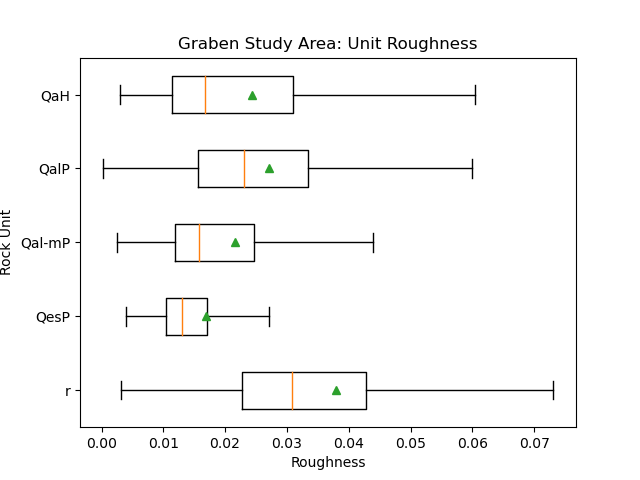

Unit       Min       Max    Median      Mean     Stdev        Q1  \
0       r  0.003152  0.730982  0.030861  0.037902  0.029606  0.022681   
1    QesP  0.003892  0.131243  0.013042  0.016889  0.013373  0.010472   
2  Qal-mP  0.002464  0.229549  0.015705  0.021674  0.016847  0.011886   
3    QalP  0.000168  0.287177  0.023018  0.027129  0.017086  0.015685   
4     QaH  0.002978  0.249881  0.016687  0.024300  0.020003  0.011422   

         Q3  
0  0.042858  
1  0.017100  
2  0.024702  
3  0.033359  
4  0.031013

In [19]:
# Mask SHPs and Roughness maps, plot stats in box plot
grab_unit_dfs = unitSHPMask(geoGraben, 'mapunit')
grab_roughMasks = roughnessMask(grab_unit_dfs, grabRough5, grabenDEM)
grab_units = geoGraben['mapunit'].unique()
grabdf = RoughBoxPlot(grab_roughMasks, grab_units, 'Graben Study Area: Unit Roughness')
grabdf

In [20]:
#grabdf.to_csv('grab_unit_roughness.csv', index=False)

### Pinon Study Area 

In [21]:
# Open Geological Map file and get rock units
PinonGEO = yield_features("Quals_DEMs/GeologicalMaps/Geo_sd.shp")
PinonGEO = gpd.GeoDataFrame.from_features(PinonGEO)
# Check that mapunit is listed as a column
print(PinonGEO.columns)
# list mapunits
print(PinonGEO['Unit'].unique())

Index(['geometry', 'Id', 'Unit', 'Lable', 'id'], dtype='object')
['Qay3']


/tmp/ipykernel_1004/1067796191.py:13: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  feature['properties']['id'] = feature['id']


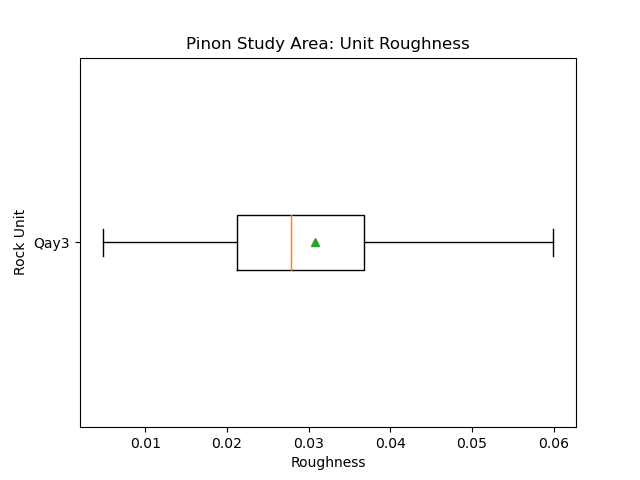

In [22]:
# Mask SHPs and Roughness maps, plot stats in box plot
pin_unit_dfs = unitSHPMask(PinonGEO, 'Unit')
pin_roughMasks = roughnessMask(pin_unit_dfs, sdRough5, sdDEM)
pin_units = PinonGEO['Unit'].unique()
pindf = RoughBoxPlot(pin_roughMasks, pin_units, 'Pinon Study Area: Unit Roughness')

In [23]:
#pindf.to_csv('pin_unit_roughness.csv', index=False)

### Zapata Fan Study Area

In [24]:
ZapGEO = yield_features("Quals_DEMs/GeologicalMaps/Geo_zap.shp")
geo_Zap = gpd.GeoDataFrame.from_features(ZapGEO)
geo_Zap = geo_Zap.sort_values('Sort', ascending = False)
# Check that mapunit is listed as a column
print(geo_Zap.columns)
# list mapunits
print(geo_Zap['Unit'].unique())

Index(['geometry', 'Id', 'Unit', 'Lable', 'Sort', 'id'], dtype='object')
['Tsf' 'Qmbl' 'Qmu' 'Qlso' 'Qls' 'Qdp' 'Qss' 'Qic' 'Qal' 'Qao1' 'Qao2'
 'Qao3' 'Qai1' 'Qai2' 'Qai3']


/tmp/ipykernel_1004/1067796191.py:13: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  feature['properties']['id'] = feature['id']


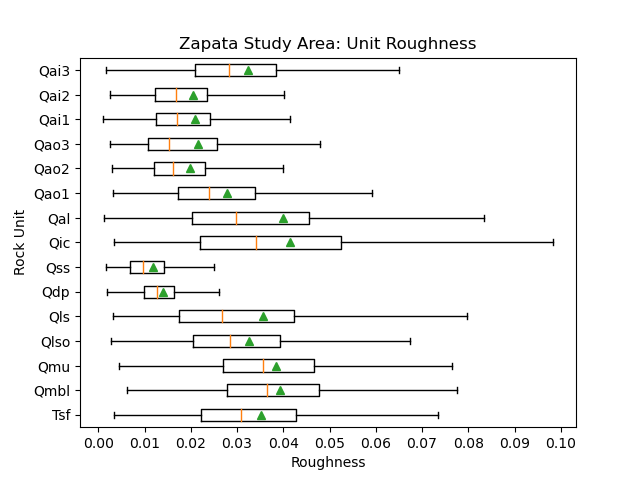

In [25]:
zap_unit_dfs = unitSHPMask(geo_Zap, 'Unit')
zap_roughMasks = roughnessMask(zap_unit_dfs, zapRough5, zapDEM)
zap_units = geo_Zap['Unit'].unique()
zap_df = RoughBoxPlot(zap_roughMasks, zap_units, 'Zapata Study Area: Unit Roughness')

In [26]:
#zap_df.to_csv('zap_unit_roughness.csv', index=False)

## Tobin

In [27]:
TobGEO = yield_features("Quals_DEMs/GeologicalMaps/Geo_tob.shp")
geo_Tob = gpd.GeoDataFrame.from_features(TobGEO)
geo_Tob = geo_Tob.sort_values('Sort', ascending = False)
# Check that mapunit is listed as a column
print(geo_Tob.columns)
# list mapunits
print(geo_Tob['Unit'].unique())

Index(['geometry', 'Id', 'Unit', 'Lable', 'Sort', 'id'], dtype='object')
['Qgft' 'Qss' 'Qtu' 'Qc' 'Qdbu' 'Qic' 'Qal' 'Qao1' 'Qao3' 'Qai1' 'Qai2'
 'Qai3' 'Qay1' 'Qay2']


/tmp/ipykernel_1004/1067796191.py:13: FionaDeprecationWarning: instances of this class -- CRS, geometry, and feature objects -- will become immutable in fiona version 2.0
  feature['properties']['id'] = feature['id']


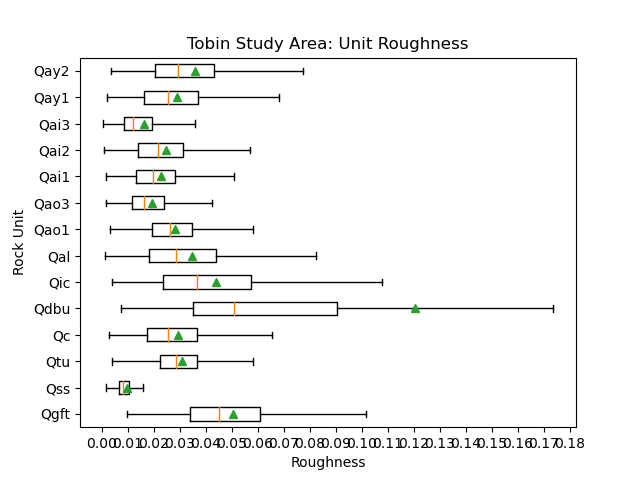

Unit       Min       Max    Median      Mean     Stdev        Q1        Q3
0   Qgft  0.009842  0.193326  0.044976  0.050657  0.024049  0.033827  0.060967
1    Qss  0.000927  0.106629  0.008354  0.009595  0.005772  0.006816  0.010386
2    Qtu  0.003924  0.211054  0.028609  0.030807  0.012298  0.022342  0.036685
3     Qc  0.002883  0.199229  0.025596  0.029195  0.016601  0.017424  0.036663
4   Qdbu  0.007409  2.892454  0.051021  0.120358  0.242597  0.035112  0.090538
5    Qic  0.003809  0.255856  0.036689  0.044111  0.028488  0.023532  0.057237
6    Qal  0.001230  0.341310  0.028653  0.034674  0.024639  0.018017  0.043763
7   Qao1  0.003076  0.115727  0.026222  0.028254  0.012774  0.019189  0.034831
8   Qao3  0.001512  0.172286  0.016126  0.019326  0.011736  0.011489  0.023835
9   Qai1  0.001765  0.346746  0.019778  0.022888  0.014973  0.013071  0.028250
10  Qai2  0.000780  0.721668  0.021554  0.024712  0.016032  0.013846  0.031130
11  Qai3  0.000311  0.296723  0.011993  0.016168  0.012674  0.008410  0.019336
12  Qay1  0.002189  0.346279  0.025414  0.029122  0.017719  0.016382  0.037093
13  Qay2  0.003496  0.632496  0.029234  0.035879  0.024171  0.020552  0.043294

In [28]:
tob_unit_dfs = unitSHPMask(geo_Tob, 'Unit')
tob_roughMasks = roughnessMask(tob_unit_dfs, tobRough5, tobDEM)
tob_units = geo_Tob['Unit'].unique()
tob_df = RoughBoxPlot(tob_roughMasks, tob_units,'Tobin Study Area: Unit Roughness')
tob_df

In [29]:
#tob_df.to_csv('tob_unit_roughness.csv', index=False)

In [30]:
tob_units

array(['Qgft', 'Qss', 'Qtu', 'Qc', 'Qdbu', 'Qic', 'Qal', 'Qao1', 'Qao3',
       'Qai1', 'Qai2', 'Qai3', 'Qay1', 'Qay2'], dtype=object)

In [31]:
from scipy.stats import ks_2samp

data1 = tob_roughMasks[-1].grid[~np.isnan(tob_roughMasks[-1].grid)].flatten()
data2 = tob_roughMasks[-2].grid[~np.isnan(tob_roughMasks[-2].grid)].flatten()
data3 = tob_roughMasks[-3].grid[~np.isnan(tob_roughMasks[-3].grid)].flatten()
ks_2samp(data1, data2)


KstestResult(statistic=0.12170459628717128, pvalue=0.0, statistic_location=0.017699582118466648, statistic_sign=-1)

In [32]:
ks_2samp(data1, data3)

KstestResult(statistic=0.5485423609627885, pvalue=0.0, statistic_location=0.016983321440390258, statistic_sign=-1)

In [33]:
data4 = tob_roughMasks[0].grid[~np.isnan(tob_roughMasks[0].grid)].flatten()
ks_2samp(data1, data4)

KstestResult(statistic=0.3557354162952987, pvalue=0.0, statistic_location=0.03197813642991492, statistic_sign=1)